In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import division
from matplotlib import colors as mcolors
import warnings 
warnings.filterwarnings("ignore") 
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [98]:
n = 50#样本个数
np.random.seed=132
# 生成数据
f = lambda x:np.hstack((np.random.normal(x[2*i],x[2*i+1],(n,1)) for i in range(2)))
datax = f([ 1,1, 1,2])
datay = f([ 1,1,20,2])
dataz = f([7,1,12,2.5])
# 将数据合并一块
data = np.r_[datax,datay,dataz]
L = len(data)

In [99]:
# 画原始图
def plot_origin_data(ax = None):
    ax.set_title('原始数据散点图')
    ax.plot(datax[:,0],datax[:,1],'ro',datay[:,0],datay[:,1],'go',dataz[:,0],dataz[:,1],'bo')
    ax.legend(['第1 类','第2 类','第3 类'])
# 计算距离矩阵
def get_distance(data):
    distance = []
    for datai in data:
        distance.append(np.linalg.norm(data - datai,axis=1))
    return np.r_[distance]
# 判断邻域内密度是否达到阈值
def is_greater_than_minpts(distance,i,minpts = 4,epsilon = 5):
    distancei = distance[i]
    return len(distancei[distancei<epsilon])>= minpts
# 距离
def dbscan(data,minpts = 5,epsilon = 5):
    # 求核心对象的集合
    omege = dict()
    distance = get_distance(data)
    for i,distancei in enumerate(distance):
        if  is_greater_than_minpts(distance,i,minpts = minpts,epsilon = epsilon):
            omege[i] = np.arange(L)[distancei<epsilon]
    omege_copy = omege.copy()    
    # 进行聚类
    k = 0
    cluster = dict()
    gamma = set(np.arange(L))
    while len(omege)>0:
        gamma_old = gamma
        rand_idx = np.random.randint(len(omege))
        Q = set(list(omege.values())[rand_idx])
        gamma = gamma - Q
        while len(Q)>0:
            q = Q.pop()
            if q in omege.keys():# 在核心点的范围内即可说明：is_greater_than_minpts
                delta = set(omege[q]) & gamma
                Q = set(Q) | delta
                gamma = gamma - Q
                omege.pop(q)
        k = k + 1
        cluster[k] = gamma_old - gamma
#         添加未被辨识的点
    b = [list(i) for i in list(cluster.values())]
    abnormal_point = set(range(L)) - set(np.hstack(b))
    return cluster,omege_copy,abnormal_point

In [108]:
cluster,omege,abnormal_point = dbscan(data,minpts = 7,epsilon = 2)
print(cluster)
print('---------------------')
if len(abnormal_point)>0:
    print('分类完毕，一共有{:} 类'.format(len(cluster)))
    print('异常点有：')
    print(abnormal_point)
else:
    print('分类完毕，一共有{:} 类'.format(len(cluster)))

{1: {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}, 2: {50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, 3: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}}
---------------------
分类完毕，一共有3 类


# 绘图
---

Text(0.5,1,'核心对象的集合')

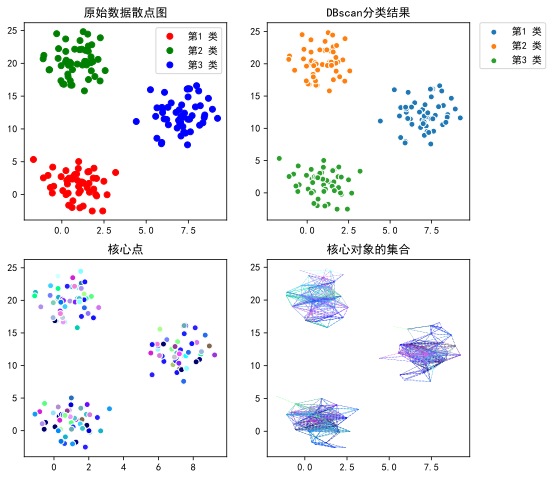

In [109]:
# 画出对比图
_,axs = plt.subplots(2,2,figsize=(8,8))
plot_origin_data(axs[0,0])
# 分类结果
for i,idx in cluster.items():
    axs[0,1].scatter(data[list(idx),0],data[list(idx),1],marker = 'o',edgecolors='w')
#     print(idx)
axs[0,1].scatter(data[list(abnormal_point),0],data[list(abnormal_point),1],c= 'k',marker = 'o',edgecolors='w')
axs[0,1].set_title('DBscan分类结果')
legend_str = ['第{:} 类'.format(i) for i in cluster.keys()]
if len(abnormal_point)>0:
    legend_str.append('未分类的点')
axs[0,1].legend(legend_str,loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

# 画线
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in mcolors.CSS4_COLORS.items())
colors = np.array(by_hsv)[np.linspace(1,len(by_hsv)-1,60,dtype=int)]
for core_point_idx,values_idx in omege.items():
    color = colors[np.random.randint(len(colors))]
    line_yi = data[values_idx]
    line_xi = data[core_point_idx]*np.ones_like(line_yi)
    line_xi,line_yi = np.c_[line_xi[:,0],line_yi[:,0]],np.c_[line_xi[:,1],line_yi[:,1]]
    axs[1,0].scatter(data[core_point_idx,0],data[core_point_idx,1],marker = 'o',edgecolors='w',c=color[0])
    axs[1,1].plot(line_xi.T,line_yi.T,'-.',linewidth = 0.3, color =color[0])
axs[1,0].set_title('核心点')
axs[1,1].set_title('核心对象的集合')